# Predicting Car Prices

In this project, we'll practice the machine learning workflow and try to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

In [1]:
import pandas as pd
import numpy as np

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=cols)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Data Cleaning

* feature columns --> wheel-base, length, width, height, curb-weight, num-of-cylinders, engine-size, horsepower, peak-rpm, city-mpg, highway-mpg
* target column --> price

Since, normalized losses and other columns contain null values in the form of ? we need to replace these values.

In [5]:
cars.replace('?', np.nan, inplace=True)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Since, many columns contain numeric values but have object datatype we need to correct the datatype in these columns.

In [8]:
def cylinder_count(val):
    if val == 'four':
        return 4
    elif val == 'six':
        return 6
    elif val == 'five':
        return 5
    elif val == 'three':
        return 3
    elif val == 'twelve':
        return 12
    elif val == 'two':
        return 2
    elif val == 'eight':
        return 8

In [9]:
cars['num-of-cylinders'] = cars['num-of-cylinders'].apply(cylinder_count).astype(int)

In [10]:
numeric_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_values_cols]

In [11]:
numeric_cars = numeric_cars.astype(float)

In [12]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [13]:
# Since, price is the target column we don't need rows with missing
# price, we can drop those rows.
numeric_cars.dropna(subset=['price'], inplace=True)

In [14]:
mean_losses = np.mean(numeric_cars[numeric_cars['normalized-losses'].notnull()]['normalized-losses'])

In [15]:
# normalized losses column contains the most missing values (ie-37),
# so we need to fill these values, we will fill them with the mean.
numeric_cars['normalized-losses'].fillna(value=mean_losses, inplace=True)

In [16]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    float64
 6   engine-size        201 non-null    float64
 7   bore               197 non-null    float64
 8   stroke             197 non-null    float64
 9   compression-rate   201 non-null    float64
 10  horsepower         199 non-null    float64
 11  peak-rpm           199 non-null    float64
 12  city-mpg           201 non-null    float64
 13  highway-mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 25.1 KB


In [17]:
numeric_cars.fillna(numeric_cars.mean(), inplace=True)
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    float64
 6   engine-size        201 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   201 non-null    float64
 10  horsepower         201 non-null    float64
 11  peak-rpm           201 non-null    float64
 12  city-mpg           201 non-null    float64
 13  highway-mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 25.1 KB


In [18]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [19]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate k-nearest neighbors models

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature_col, target_col, df):
    knn = KNeighborsRegressor(n_neighbors=5)
    end_pt = round(len(df)/2)
    train_df = df.iloc[:end_pt]
    test_df = df.iloc[end_pt:]
    knn.fit(train_df[[feature_col]], train_df[target_col])
    predictions = knn.predict(test_df[[feature_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse**0.5
    return rmse

In [21]:
cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
rmse_list = []
for col in cols:
    rmse_list.append(knn_train_test(col, 'price', numeric_cars))
    
feature_rmse = pd.Series(index = cols, data = rmse_list)

In [22]:
feature_rmse

normalized-losses     8131.436882
wheel-base            9969.243292
length                8304.189346
width                 7110.412630
height               10839.693636
curb-weight           5166.828581
engine-size           4190.433888
bore                 13397.091693
stroke                9334.714914
compression-rate      8096.301512
horsepower            4267.730361
peak-rpm              9759.209970
city-mpg              4814.778015
highway-mpg           4628.793094
dtype: float64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


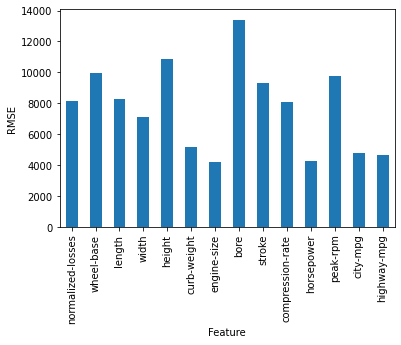

In [24]:
%matplotlib inline
feature_rmse.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('RMSE')
plt.show()

In [25]:
# the same function but with k value parameter
def knn_train_test_k(feature_col, target_col, df, k_val):
    knn = KNeighborsRegressor(n_neighbors=k_val)
    end_pt = round(len(df)/2)
    train_df = df.iloc[:end_pt]
    test_df = df.iloc[end_pt:]
    
    knn.fit(train_df[[feature_col]], train_df[target_col])
    predictions = knn.predict(test_df[[feature_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse**0.5
    return rmse

In [26]:
rmse_dict = {}
for col in cols:
    k_dict = {}
    for i in range(1, 10, 2):
        rmse_val = knn_train_test_k(col, 'price', numeric_cars, i)
        k_dict[i] = rmse_val
    rmse_dict[col] = k_dict

rmse_dict

{'normalized-losses': {1: 11628.904782718988,
  3: 9578.793245190305,
  5: 8131.436882072488,
  7: 7441.814253467208,
  9: 7644.0837748147915},
 'wheel-base': {1: 8052.050206913359,
  3: 9171.153878561105,
  5: 9969.243291700175,
  7: 8938.808809133783,
  9: 8637.3043859821},
 'length': {1: 10053.579063701594,
  3: 8230.050248540974,
  5: 8304.189346264562,
  7: 8483.928913734228,
  9: 7655.12304417215},
 'width': {1: 8044.1444455819,
  3: 7234.558219432825,
  5: 7110.412630045104,
  7: 6621.848358316696,
  9: 6531.417638109127},
 'height': {1: 13032.276289928392,
  3: 11411.019683044135,
  5: 10839.693635873846,
  7: 10041.327943738908,
  9: 9313.330965281266},
 'curb-weight': {1: 6566.749175404316,
  3: 5635.184748392448,
  5: 5166.828580646175,
  7: 5239.631250704795,
  9: 5244.5555635847895},
 'engine-size': {1: 5338.7918201602415,
  3: 4698.501673022703,
  5: 4190.43388788236,
  7: 4114.571307788718,
  9: 4056.629359658438},
 'bore': {1: 16502.858944335483,
  3: 13895.11178798717,

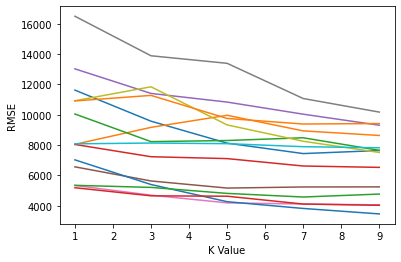

In [27]:
%matplotlib inline

for k, v in rmse_dict.items():
    x = [i for i in range(1, 10, 2)]
    y = []
    for i in x:
        y.append(v[i])
    
    plt.plot(x, y)
    plt.xlabel('K Value')
    plt.ylabel('RMSE')

## Multivariate k-nearest neighbors models

In [28]:
feature_rmse.sort_values(ascending=True).head(5)  # the results of the previous run(univariate model)

engine-size    4190.433888
horsepower     4267.730361
highway-mpg    4628.793094
city-mpg       4814.778015
curb-weight    5166.828581
dtype: float64

These features are the best perfoming features with the lowest rmse. So, now we will use these features in groups of 2, 3, 4, 5.

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# this function can now accept multiple feature values
def knn_train_test(feature_cols, target_col, df, k_val):
    # feature_cols is a list
    knn = KNeighborsRegressor(n_neighbors=k_val)
    end_pt = round(len(df)/2)
    train_df = df.iloc[:end_pt]
    test_df = df.iloc[end_pt:]
    knn.fit(train_df[feature_cols], train_df[target_col])
    predictions = knn.predict(test_df[feature_cols])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse**0.5
    return rmse

In [30]:
features = ['engine-size', 'horsepower', 'highway-mpg', 'city-mpg',
            'curb-weight']
feature_used = []
rmse_dict = {}
for i in range(5):
    feature_used.append(features[i])
    rmse_val = knn_train_test(feature_used, 'price', numeric_cars, 5)
    rmse_dict[str(feature_used)] = rmse_val

In [31]:
for k, v in rmse_dict.items():
    print(k)
    print(v)
    print('-'*10)

['engine-size']
4190.43388788236
----------
['engine-size', 'horsepower']
3501.733879942991
----------
['engine-size', 'horsepower', 'highway-mpg']
3553.981440358945
----------
['engine-size', 'horsepower', 'highway-mpg', 'city-mpg']
3543.6021088353828
----------
['engine-size', 'horsepower', 'highway-mpg', 'city-mpg', 'curb-weight']
3874.8264102159374
----------


## Hyperparameter Tuning

From the previous model the top 3 were the ones with the following features :-
* ['engine-size', 'horsepower']
* ['engine-size', 'horsepower', 'highway-mpg', 'city-mpg']
* ['engine-size', 'horsepower', 'highway-mpg']

We will now vary the hyperparameter(n-neighbors) from 1 to 25 to find the optimum value for each of the three models.

### MODEL-1

In [32]:
features = ['engine-size', 'horsepower']
rmse_dict_1 = {}
for i in range(1, 26):
    rmse_val = knn_train_test(features, 'price', numeric_cars, i)
    rmse_dict_1[i] = rmse_val

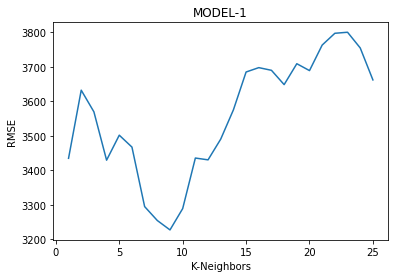

In [33]:
pd.Series(rmse_dict_1).plot()
plt.xlabel('K-Neighbors')
plt.ylabel('RMSE')
plt.title('MODEL-1')
test = plt.show()

### MODEL-2

In [34]:
features = ['engine-size', 'horsepower', 'highway-mpg', 'city-mpg']
rmse_dict_2 = {}
for i in range(1, 26):
    rmse_val = knn_train_test(features, 'price', numeric_cars, i)
    rmse_dict_2[i] = rmse_val

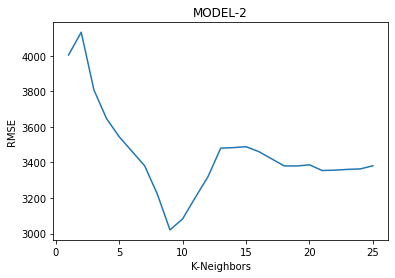

In [35]:
pd.Series(rmse_dict_2).plot()
plt.xlabel('K-Neighbors')
plt.ylabel('RMSE')
plt.title('MODEL-2')
plt.show()

### MODEL-3

In [36]:
features = ['engine-size', 'horsepower', 'highway-mpg']
rmse_dict_3 = {}
for i in range(1, 26):
    rmse_val = knn_train_test(features, 'price', numeric_cars, i)
    rmse_dict_3[i] = rmse_val

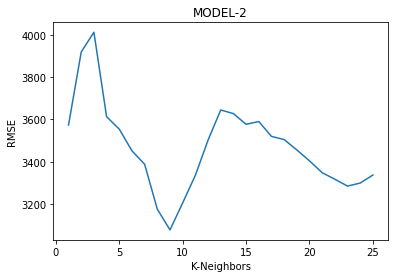

In [37]:
pd.Series(rmse_dict_3).plot()
plt.xlabel('K-Neighbors')
plt.ylabel('RMSE')
plt.title('MODEL-2')
plt.show()

From the above three graphs we can see that k value of 9 returned the least rmse for the all the three models so k value of 9 should be used.